# TASK 1

In [49]:
import pandas as pd

In [50]:
df_data1 = pd.read_csv('data1.csv')
df_data1.drop(columns=df_data1.columns[0], axis=1, inplace=True)
df_data1.loc[df_data1['Class']==1,'Class']=0
df_data1.loc[df_data1['Class']==2,'Class']=1
df_data1.loc[df_data1['Class']==3,'Class']=2
df_data1.loc[df_data1['Class']==4,'Class']=3
df_data1.loc[df_data1['Class']==5,'Class']=4
df_data1.loc[df_data1['Class']==6,'Class']=5
df_data1.loc[df_data1['Class']==7,'Class']=6

In [51]:
df_data1

,X1,X2,X3,Class
0,-0.063274,0.027734,0.022683,0
1,-0.000731,0.048211,0.069198,0
2,-0.060767,-0.009080,0.053085,0
3,0.013252,-0.011876,0.055324,0
4,-0.054508,-0.003813,0.001738,0
...,...,...,...,...
207,0.175738,-0.053478,-2.733752,6
208,0.396046,-0.858377,-3.126866,6
209,-0.406362,-0.334541,-2.885598,6
210,-0.299275,0.071281,-3.642585,6


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



SSE model_data1 Data: 2579.29812387843
SSE model_data1 Data: 1785.7767864279167
SSE model_data1 Data: 1255.8227209427248
SSE model_data1 Data: 893.0380873829331
SSE model_data1 Data: 550.7240557421219
SSE model_data1 Data: 261.67418428008625
SSE model_data1 Data: 106.14764659310865
SSE model_data1 Data: 98.76693842019226
SSE model_data1 Data: 92.15538206054741


C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

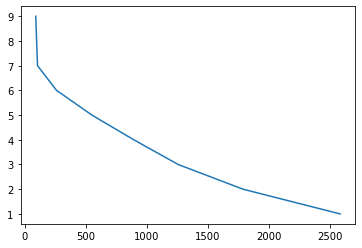

In [52]:
# finding the value of k
ans = []
for i in range(1,10):
    model_data1 = KMeans(n_clusters=i)
    model_data1.fit(df_data1.iloc[:,0:4])
    print('SSE model_data1 Data: '+ str(model_data1.inertia_))
    t = model_data1.inertia_
    ans.append(t)
import seaborn as sns
sns.lineplot(ans,range(1,10))

In [141]:
# from here we can conlude that k value should be 4
model_data1 = KMeans(n_clusters=7)
model_data1.fit(df_data1.iloc[:,0:3])
print('SSE model_data1 Data: '+ str(model_data1.inertia_))

SSE model_data1 Data: 106.14764659310865


In [142]:
print(model_data1.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [143]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df_data1['Class'],model_data1.labels_))

0.29245283018867924


In [106]:
from sklearn.metrics import f1_score
print(f1_score(df_data1.iloc[:,3], model_data1.labels_,average='micro'))

0.2830188679245283


In [69]:
metrics.adjusted_rand_score(df_data1.iloc[:,3], model_data1.labels_)

1.0

In [61]:
import plotly.express as px
fig = px.scatter_3d(df_data1, x='X1', y='X2', z='X3',color='Class')
fig.show()

In [62]:
df_data1_predicted=df_data1.iloc[:,0:3]
df_data1_predicted['Class']= model_data1.labels_
import plotly.express as px
fig = px.scatter_3d(df_data1_predicted, x='X1', y='X2', z='X3',color='Class')
fig.show()

In [144]:
metrics.cluster.contingency_matrix(df_data1.iloc[:,3], model_data1.labels_)

array([[32,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0, 30],
       [ 0,  0,  0,  0, 30,  0,  0]], dtype=int64)